In [1]:
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set_style("dark")

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tools import eval_measures

In [2]:
main_price = pd.read_csv('../data/stock/main_price.csv', index_col=0)

# Format the index
main_price.index = pd.to_datetime(main_price.index)
main_price

FileNotFoundError: [Errno 2] No such file or directory: '../data/stock/main_price.csv'

In [ ]:
# Let's set aside 200 days of data
test_price = main_price.tail(200)
train_price = main_price.drop(main_price.tail(200).index, axis=0)

<AxesSubplot:xlabel='Date'>

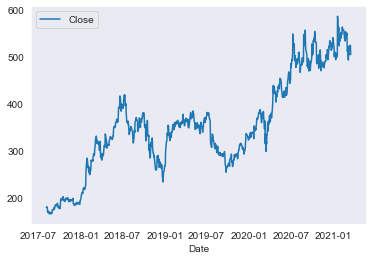

In [57]:
sns.lineplot(data=train_price)

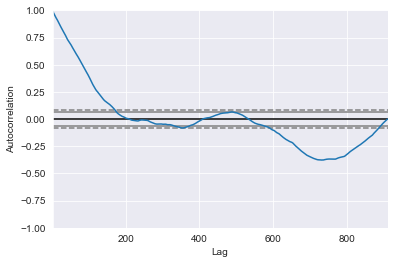

In [58]:
# Check for autocorrelation
autocorrelation_plot(train_price)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  911
Model:               ARIMA(160, 1, 0)   Log Likelihood               -3262.896
Date:                Fri, 05 Aug 2022   AIC                           6847.792
Time:                        17:12:11   BIC                           7622.756
Sample:                    08-04-2017   HQIC                          7143.677
                         - 03-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0764      0.037     -2.081      0.037      -0.148      -0.004
ar.L2          0.0301      0.038      0.791      0.429      -0.044       0.105
ar.L3         -0.0026      0.040     -0.064      0.9

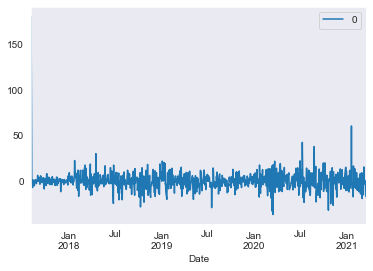

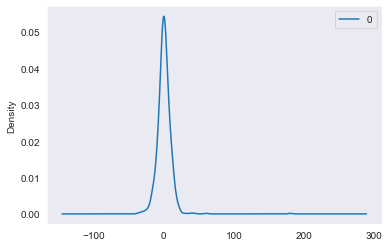

                0
count  911.000000
mean     0.613602
std     10.498652
min    -36.430929
25%     -3.938374
50%      0.405900
75%      5.182995
max    180.270004


In [60]:
# Change to period
train_price.index = train_price.index.to_period('D')
# fit model
model = ARIMA(train_price, order=(160,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [61]:
model_fit.save('model.pkl')

In [70]:
loaded = ARIMAResults.load('model.pkl')

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  911
Model:               ARIMA(160, 1, 0)   Log Likelihood               -3262.896
Date:                Sat, 06 Aug 2022   AIC                           6847.792
Time:                        14:46:22   BIC                           7622.756
Sample:                    08-04-2017   HQIC                          7143.677
                         - 03-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0764      0.037     -2.081      0.037      -0.148      -0.004
ar.L2          0.0301      0.038      0.791      0.429      -0.044       0.105
ar.L3         -0.0026      0.040     -0.064      0.9

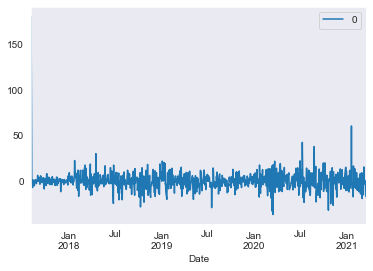

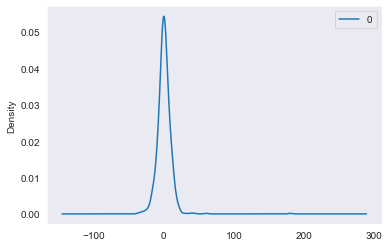

                0
count  911.000000
mean     0.613602
std     10.498652
min    -36.430929
25%     -3.938374
50%      0.405900
75%      5.182995
max    180.270004


In [71]:
# Checking if it loaded correctly
print(loaded.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [79]:
arima_pred = loaded.predict(start=test_price.index[1], end=test_price.index[-1])

In [75]:
end = main_price.index[-1]

Period('2021-12-31', 'D')

In [84]:
test_price.shape

(200, 1)

In [94]:
print(test_price.index[1])
print(test_price.index[-1])


2021-03-22 00:00:00
2021-12-31 00:00:00


pandas.core.series.Series

<AxesSubplot:>

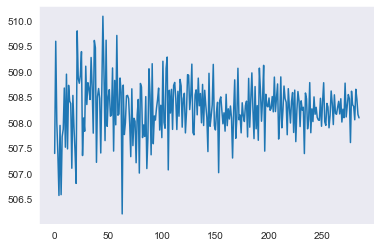

In [97]:
sns.lineplot(data=arima_pred.values)

<AxesSubplot:>

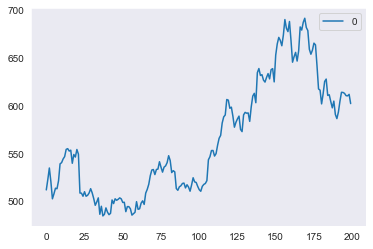

In [100]:
sns.lineplot(data=test_price.values)